In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import datetime as dt
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Import statsmodels package for training a linear regression model.
from patsy import dmatrices
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df = pd.read_csv('130114.csv')
df.set_index('LineID',inplace=True)
df.head()

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,DateTime,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
LineID,,,,,,,,,,,,,,,
66.0,0,2013-01-14 00:00:01,0,00660001,2013-01-13,14217,PO,0,-6.569710,53.380451,222,66006,40001,3968,0
40.0,1,2013-01-14 00:00:01,0,040D0001,2013-01-13,14403,HN,0,-6.373083,53.410049,338,40204,38067,6005,0
27.0,2,2013-01-14 00:00:01,0,077A1001,2013-01-13,14130,RD,0,-6.259118,53.345650,-534,27009,33254,1358,0
39.0,3,2013-01-14 00:00:01,0,039A0001,2013-01-13,14729,PO,0,-6.274983,53.350784,-125,39015,33557,7160,0
46.0,4,2013-01-14 00:00:01,0,046A0001,2013-01-13,16565,D1,0,-6.230600,53.317665,-988,46007,33532,2032,0


In [3]:
df.loc[41].to_csv('41.csv')
df_dt = pd.read_csv('41.csv')
df_dt.head()

,LineID,Unnamed: 0,DateTime,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,41.0,12,2013-01-14 00:00:01,0,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0
1,41.0,28,2013-01-14 00:00:03,0,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0
2,41.0,119,2013-01-14 00:00:13,0,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,41.0,122,2013-01-14 00:00:16,0,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,41.0,125,2013-01-14 00:00:22,0,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0


In [4]:
#delete the constant columns
#drop the constant numberic columns
num_columns = df_dt.select_dtypes(['int64','float64']).columns
num_columns
for column in num_columns:
    if len(df_dt[column].unique()) == 1:
        df_dt.drop([column], 1, inplace=True)
df_dt.head()

,Unnamed: 0,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,12,2013-01-14 00:00:01,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0
1,28,2013-01-14 00:00:03,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0
2,119,2013-01-14 00:00:13,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,122,2013-01-14 00:00:16,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,125,2013-01-14 00:00:22,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0


In [5]:
df_dt.drop(['Unnamed: 0','Opertator'],axis=1).to_csv('130114_41.csv', index=None)
df = pd.read_csv('130114_41.csv')
df.head()

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0


In [6]:
df.dtypes

DateTime             object
JourneyPatternID     object
TimeFrame            object
VehicleJourneyID      int64
Congestion            int64
LonWGS84            float64
LatWGS84            float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
dtype: object

In [7]:
df.describe()

,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,AtStop
count,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000
mean,3665.514040,0.002494,-6.244420,53.408795,-36.580213,216473.791905,33758.555731,0.230730
std,51609.074641,0.049877,0.015582,0.045611,428.812349,324866.248268,1303.311996,0.421304
min,4.000000,0.000000,-6.327800,53.276932,-1814.000000,41001.000000,33057.000000,0.000000
25%,60.000000,0.000000,-6.255383,53.362541,-202.000000,41006.000000,33268.000000,0.000000
50%,120.000000,0.000000,-6.245832,53.416302,0.000000,41011.000000,33429.000000,0.000000
75%,180.000000,0.000000,-6.233648,53.456684,81.000000,41018.000000,33628.000000,0.000000
max,920145.000000,1.000000,-6.141937,53.565384,31362.000000,835002.000000,40050.000000,1.000000


In [8]:
df['Congestion'] = df['Congestion'].astype('category')
df['BlockID'] = df['BlockID'].astype('category')
df['VehicleID'] = df['VehicleID'] .astype('category')
df['AtStop'] = df['AtStop'].astype('category')
df['VehicleJourneyID'] = df['VehicleJourneyID'].astype('category')
#df['LonWGS84'] = df['LonWGS84'].astype('category')
#df['LatWGS84'] = df['LatWGS84'].astype('category')

object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

DateTime            category
JourneyPatternID    category
TimeFrame           category
VehicleJourneyID    category
Congestion          category
LonWGS84             float64
LatWGS84             float64
Delay                  int64
BlockID             category
VehicleID           category
StopID              category
AtStop              category
dtype: object

In [9]:
df.select_dtypes(['category']).describe().T 

,count,unique,top,freq
DateTime,52529,19442,2013-01-14 08:30:42,19
JourneyPatternID,52529,21,00411001,10596
TimeFrame,52529,2,2013-01-14,52154
VehicleJourneyID,52529,259,37,632
Congestion,52529,2,0,52398
BlockID,52529,36,41007,2969
VehicleID,52529,46,33114,2827
StopID,52529,195,null,4343
AtStop,52529,2,0,40409


 # Data Understanding: data quality plan

## Irregular cardinality

In [10]:
# Check for irregular cardinality in categorical features.
df.select_dtypes(['category']).columns
print("Unique values for:\n- JourneyPatternID:", pd.unique(df.JourneyPatternID.ravel()))
print("\n- TimeFrame:", sorted(pd.unique(df.TimeFrame.ravel())))
print("\n- VehicleJourneyID:", sorted(pd.unique(df.VehicleJourneyID.ravel())))
print("\n- Congestion:", pd.unique(df.Congestion.ravel()))
print("\n- BlockID:", pd.unique(df.BlockID.ravel()))
print("\n- VehicleID:", pd.unique(df.VehicleID.ravel()))
print("\n- StopID:", pd.unique(df.StopID.ravel()))
print("\n- AtStop:", pd.unique(df.AtStop.ravel()))

Unique values for:
- JourneyPatternID: ['041C1001' '00411001' '041C0001' '041B0002' 'null' '00410001' '041C1002'
 '041B0001' '041A1001' '00411002' '041X1003' '00410005' '041B1002'
 '041X1002' '00410003' '041X1001' '00410006' '00411004' '041X0002'
 '00411003' '041X0001']

- TimeFrame: ['2013-01-13', '2013-01-14']

- VehicleJourneyID: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 1

In [11]:
df.isnull().sum()

DateTime            0
JourneyPatternID    0
TimeFrame           0
VehicleJourneyID    0
Congestion          0
LonWGS84            0
LatWGS84            0
Delay               0
BlockID             0
VehicleID           0
StopID              0
AtStop              0
dtype: int64

## Outlier

# Exploring relationship between feature pairs

##  plots between continous and categorical features with  target feature

### Dealy with DateTime

In [12]:
df[['Delay','LonWGS84','LatWGS84']].corr()

,Delay,LonWGS84,LatWGS84
Delay,1.000000,-0.037067,-0.112720
LonWGS84,-0.037067,1.000000,0.360667
LatWGS84,-0.112720,0.360667,1.000000


According to the above table, it can be seen that longitude and latitude both do not have relationship with delay.

In [13]:

aggregations = {
    'Delay':"sum"
}
group = df.groupby(df['DateTime'])['Delay'].agg(aggregations)
group

,Delay
DateTime,
2013-01-14 00:00:01,-377
2013-01-14 00:00:03,-216
2013-01-14 00:00:13,-48
2013-01-14 00:00:16,-684
2013-01-14 00:00:22,-408
2013-01-14 00:00:24,-216
2013-01-14 00:00:34,-732
2013-01-14 00:00:42,-408
2013-01-14 00:00:44,-198


In [14]:
#df.groupby([df['DateTime'],pd.TimeGrouper(freq='30Min')])

In [15]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
df1 = df.set_index("DateTime")
df1.resample("60Min").mean().to_csv('2.csv')
clean_df = pd.read_csv('2.csv')
clean_df.head()

,DateTime,LonWGS84,LatWGS84,Delay
0,2013-01-14 00:00:00,-6.247032,53.38429,-386.946667
1,2013-01-14 01:00:00,NaN,NaN,NaN
2,2013-01-14 02:00:00,NaN,NaN,NaN
3,2013-01-14 03:00:00,NaN,NaN,NaN
4,2013-01-14 04:00:00,NaN,NaN,NaN


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), <a list of 24 Text xticklabel objects>)

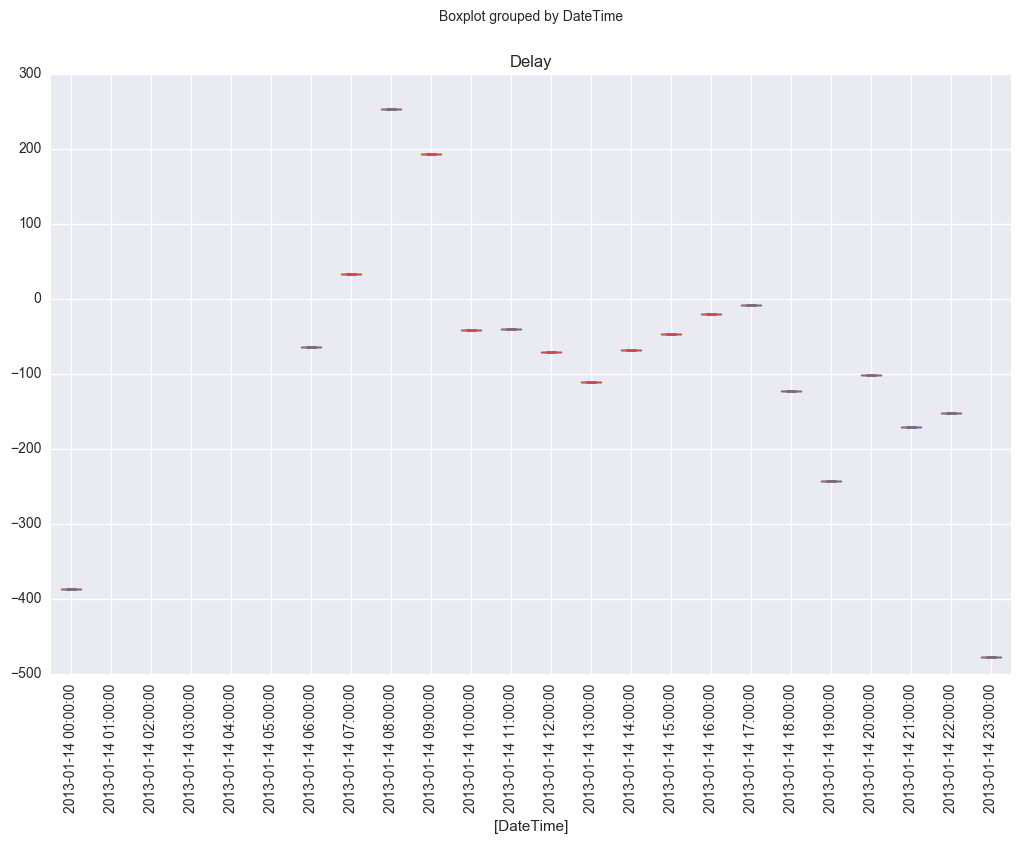

In [16]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['DateTime'],flierprops=flierprops,figsize=(12,8))
pl.xticks(rotation = 90)

In [17]:
g = df.groupby(['JourneyPatternID'])
g['VehicleID'].unique()

JourneyPatternID
00410001    [33422, 33272, 35007, 33462, 33267, ..., 33633...
00410003               [33228]
Categories (1, int64): [33228]
00410005               [33422]
Categories (1, int64): [33422]
00410006               [33268]
Categories (1, int64): [33268]
00411001    [40050, 33637, 33420, 33422, 33267, ..., 33057...
00411002    [33272, 35007, 33636, 33637]
Categories (4, in...
00411003               [40026]
Categories (1, int64): [40026]
00411004               [33511]
Categories (1, int64): [33511]
041A1001    [33268, 33425]
Categories (2, int64): [33268, ...
041B0001               [33271]
Categories (1, int64): [33271]
041B0002    [33228, 33271, 33113, 33633, 33450]
Categories...
041B1002    [33271, 33113, 33633]
Categories (3, int64): [...
041C0001    [33635, 33425, 33637, 33420, 33111, ..., 33634...
041C1001    [40049, 33503, 33228, 33111, 33634, ..., 33268...
041C1002    [33462, 40046, 33111, 33378, 33628, 33214, 331...
041X0001               [35001]
Categories (1, int64):

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 46 Text xticklabel objects>)

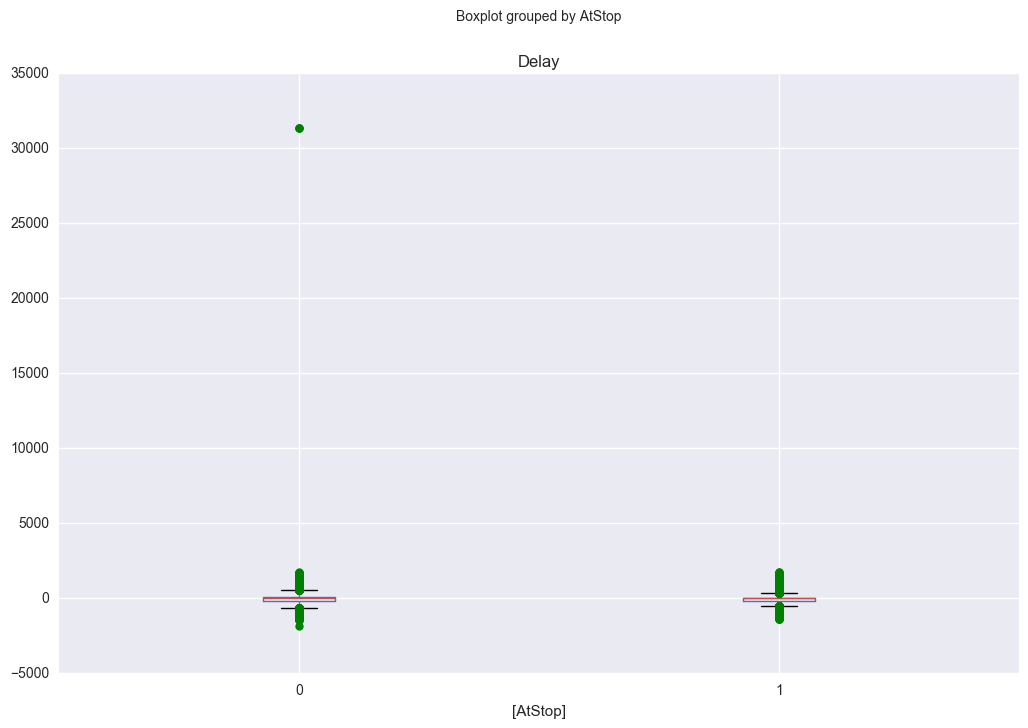

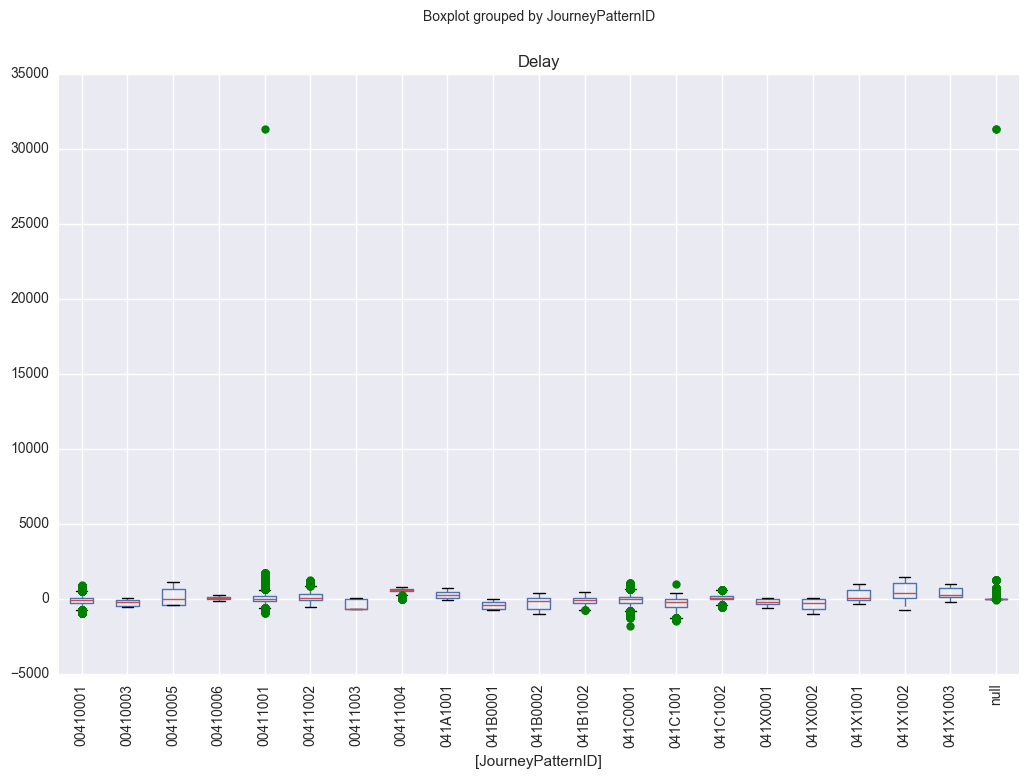

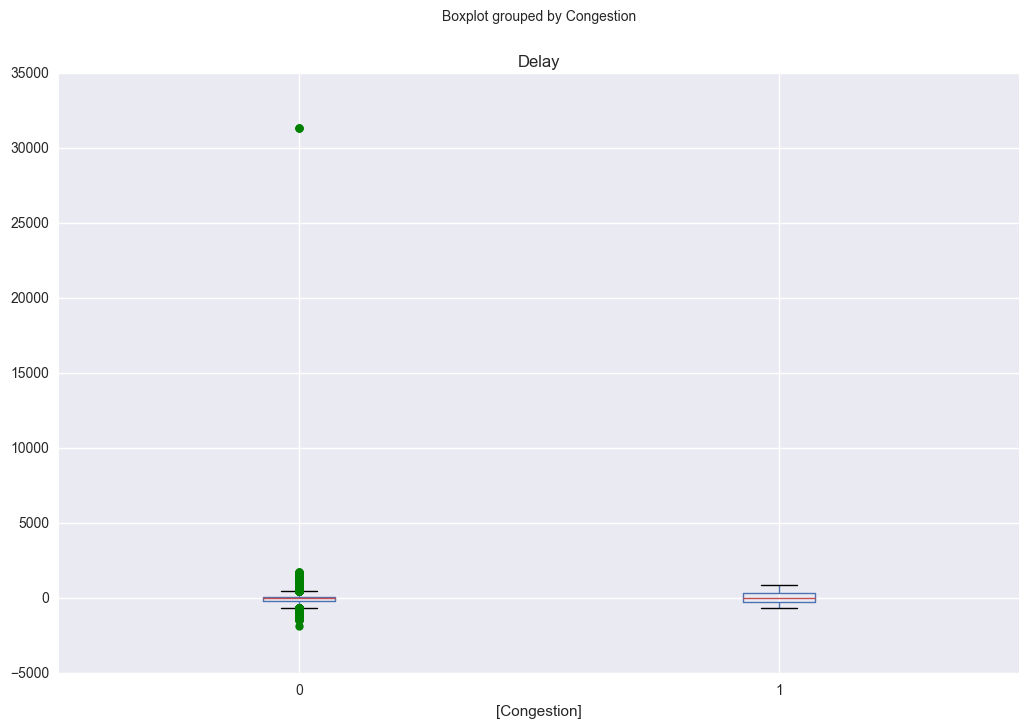

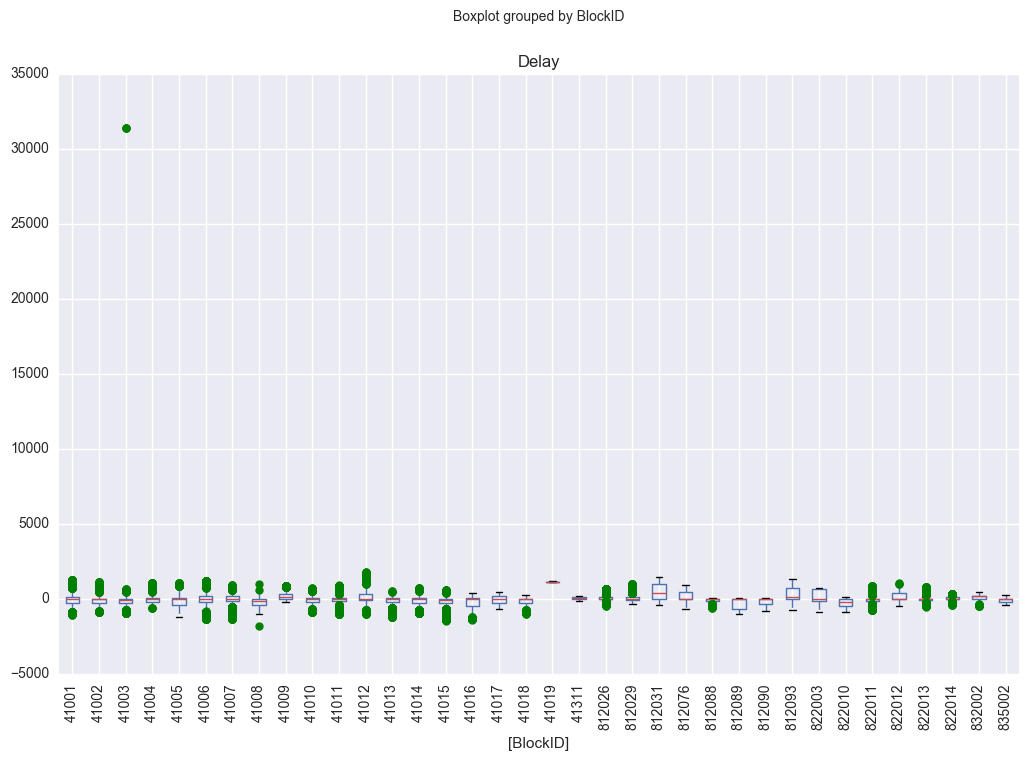

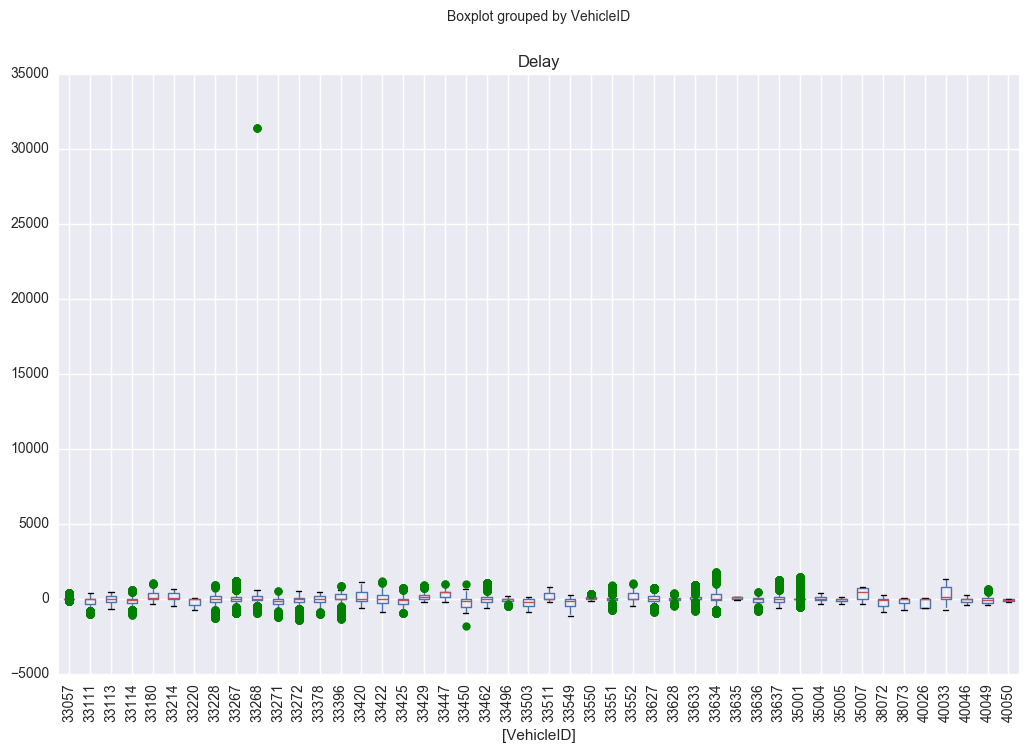

In [18]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = df.boxplot(column=['Delay'], by=['AtStop'], flierprops=flierprops, figsize=(12,8))
bp = df.boxplot(column=['Delay'], by=['JourneyPatternID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)
bp = df.boxplot(column=['Delay'], by=['Congestion'], flierprops=flierprops, figsize=(12,8))
bp = df.boxplot(column=['Delay'], by=['BlockID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)
bp = df.boxplot(column=['Delay'], by=['VehicleID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)

In [19]:
# find the 5 higest listingprice
df.sort_values(by='Delay', axis=0, ascending=False, inplace=False,kind='quicksort',na_position='last').head(5)

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
47987,2013-01-14 20:38:04,null,2013-01-14,3553,0,-6.255767,53.349083,31362,41003,33268,4957,0
47979,2013-01-14 20:37:46,00411001,2013-01-14,3553,0,-6.255717,53.349133,31362,41003,33268,4957,0
48004,2013-01-14 20:38:43,null,2013-01-14,3553,0,-6.255784,53.349083,31362,41003,33268,4957,0
8747,2013-01-14 08:27:25,00411001,2013-01-14,98,0,-6.260511,53.350815,1762,41012,33634,277,1
8773,2013-01-14 08:27:46,00411001,2013-01-14,98,0,-6.260450,53.350674,1762,41012,33634,277,0


### According to the above graphs and the table, there are some outliers that are the same data. we can delete those data from original data.

In [20]:
#delete the outliers rows 
import csv

inpu = open('13011441.csv', 'r')
output = open('011441.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[1]!="null":
        writer.writerow(row)
inpu.close()
output.close()

In [21]:
df = pd.read_csv('011441.csv')
df

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0
5,2013-01-14 00:00:24,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,40050,277,0
6,2013-01-14 00:00:34,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,33635,3707,0
7,2013-01-14 00:00:34,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,33228,7135,0
8,2013-01-14 00:00:42,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,40049,52,0
9,2013-01-14 00:00:44,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,40050,277,0


# Data Preparation

## Normalization

In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
df['new_date'] = [d.date() for d in df['DateTime']]
df['new_time'] = [d.time() for d in df['DateTime']]
df

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,new_date,new_time
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0,2013-01-14,00:00:01
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0,2013-01-14,00:00:03
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0,2013-01-14,00:00:13
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0,2013-01-14,00:00:16
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0,2013-01-14,00:00:22
5,2013-01-14 00:00:24,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,40050,277,0,2013-01-14,00:00:24
6,2013-01-14 00:00:34,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,33635,3707,0,2013-01-14,00:00:34
7,2013-01-14 00:00:34,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,33228,7135,0,2013-01-14,00:00:34
8,2013-01-14 00:00:42,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,40049,52,0,2013-01-14,00:00:42
9,2013-01-14 00:00:44,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,40050,277,0,2013-01-14,00:00:44


In [23]:
#normalized the VehicleJourneyID and StopID
df_cont = df[['VehicleJourneyID','StopID','BlockID']]
df_cont.head()

,VehicleJourneyID,StopID,BlockID
0,13146,52,41005
1,13138,277,41009
2,13158,3707,41004
3,13075,7135,41001
4,13146,52,41005


In [24]:
#Range normalise all columns
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm.head()

,VehicleJourneyID,StopID,BlockID
0,0.014283,0.005045,0.000005
1,0.014274,0.035724,0.000010
2,0.014296,0.503409,0.000004
3,0.014205,0.970821,0.000000
4,0.014283,0.005045,0.000005


In [25]:
df_norm2 = df_norm * 2 - 1 
df_norm2.head()

,VehicleJourneyID,StopID,BlockID
0,-0.971435,-0.989910,-0.999990
1,-0.971452,-0.928552,-0.999980
2,-0.971409,0.006818,-0.999992
3,-0.971589,0.941642,-1.000000
4,-0.971435,-0.989910,-0.999990


In [26]:
d = df['JourneyPatternID']
new =[]
for i in d:
    new.append(i[4])
a = pd.DataFrame({'JourneyID': new})
a.head()

,JourneyID
0,1
1,1
2,0
3,0
4,1


In [27]:
time = df['new_time']
ne =[]
for i in time:
    h=i.hour
    ne.append(h)
t = pd.DataFrame({'time': ne})
t.head()

,time
0,0
1,0
2,0
3,0
4,0


In [28]:
df_new = pd.concat([t.time,a.JourneyID,df.JourneyPatternID,df_norm2.VehicleJourneyID,
                     df.Congestion,df.Delay,df_norm2.BlockID
                    ,df_norm2.StopID,df.AtStop,df.new_time],axis=1)
df_new

,time,JourneyID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,BlockID,StopID,AtStop,new_time
0,0,1,041C1001,-0.971435,0,-377,-0.999990,-0.989910,0,00:00:01
1,0,1,00411001,-0.971452,0,-216,-0.999980,-0.928552,0,00:00:03
2,0,0,041C0001,-0.971409,0,-48,-0.999992,0.006818,0,00:00:13
3,0,0,041B0002,-0.971589,0,-684,-1.000000,0.941642,0,00:00:16
4,0,1,041C1001,-0.971435,0,-408,-0.999990,-0.989910,0,00:00:22
5,0,1,00411001,-0.971452,0,-216,-0.999980,-0.928552,0,00:00:24
6,0,0,041C0001,-0.971409,0,-48,-0.999992,0.006818,0,00:00:34
7,0,0,041B0002,-0.971589,0,-684,-1.000000,0.941642,0,00:00:34
8,0,1,041C1001,-0.971435,0,-408,-0.999990,-0.989910,0,00:00:42
9,0,1,00411001,-0.971452,0,-198,-0.999980,-0.928552,0,00:00:44


# Random Forest

In [29]:
#Select the train set data
X=df_new[df_new[['JourneyID','time','Congestion','VehicleJourneyID','StopID','AtStop','BlockID']].columns]
y=df_new[df_new[['Delay']].columns]
# Instantiate estimator, fit with training set
# Train a classification tree
rfc = RandomForestClassifier(n_estimators=50, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


In [30]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_})

,feature,importance
0,JourneyID,0.009738
1,time,0.112853
2,Congestion,0.000678
3,VehicleJourneyID,0.146761
4,StopID,0.609278
5,AtStop,0.023788
6,BlockID,0.096904


According to the above table, it can be seen that the most important feature is StopID. the three least important features are AtStop, Congestion and JourneyID.

In [31]:
#Select the train set data
X=df_new[df_new[['time','VehicleJourneyID','StopID']].columns]
y=df_new[df_new[['Delay']].columns]
# Instantiate estimator, fit with training set
# Train a classification tree
rfc = RandomForestClassifier(n_estimators=20, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


In [32]:
rfc.predict(X)

array([ -408,  -216,   -48, ..., -1221,  -760,  -621])

In [35]:
df_predict=pd.DataFrame({'Actual':df_new.Delay, 'Predict':rfc.predict(X)})
df_predict

,Actual,Predict
0,-377,-408
1,-216,-216
2,-48,-48
3,-684,-684
4,-408,-408
5,-216,-216
6,-48,-48
7,-684,-684
8,-408,-408
9,-198,-216


In [34]:
print("Accuracy: ", metrics.accuracy_score(y, df_predict.Predict))
print("Confusion matrix: \n", metrics.confusion_matrix(y, df_predict.Predict))
print("Classification report:\n ", metrics.classification_report(y, df_predict.Predict))

Accuracy:  0.641534666021
Confusion matrix: 
 [[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
Classification report:
               precision    recall  f1-score   support

      -1814       1.00      1.00      1.00         1
      -1450       0.00      0.00      0.00         1
      -1435       0.00      0.00      0.00         1
      -1430       0.00      0.00      0.00         1
      -1410       0.00      0.00      0.00         1
      -1404       0.00      0.00      0.00         3
      -1393       0.45      1.00      0.62         5
      -1391       0.00      0.00      0.00         1
      -1379       0.00      0.00      0.00         2
      -1375       0.67      1.00      0.80        12
      -1370       0.00      0.00      0.00         1
      -1369       0.50      1.00      0.67         2
      -1348       1.00      0.40      0.57         5
      -1336       1.00      1.00      1.00         3
     

/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_new.Delay - rfc.predict(X))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 6592.36851813


In [38]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_new.Delay - rfc.predict(X)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 25.9843904913
